In [4]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 4.9 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 111 kB 42.4 MB/s 
     |████████████████████████████████| 127 kB 43.0 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c0c2c5eb5f893f92d0c5bd72c236402771b8ca19fd35210479f322d3efd04209
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=f16a0145626aaf506c7273c3314ab99ac46b2b422c814232fb9f596b836589d9
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=0921311779b6004aed301bfeb0c461029049f4bedb892746407be9b8cd3d3a2f
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [2]:
!pip install tslearn

     |████████████████████████████████| 793 kB 8.4 MB/s 


In [5]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf
import yahoo_fin

In [ ]:
import yahoo_fin.stock_info as si
sp500 = si.tickers_sp500()

In [ ]:
def get_info(ticker_obj):
    info_keys = ['shortName', 'sector', 'industry', 'country', 'market']
    info_values = []
    for key in info_keys:
        info_values.append(ticker_obj.info.get(key, None))
    return dict(zip(info_keys, info_values))

In [ ]:
snp500 = []
tiker_list = np.random.choice(sp500, size=50)

for ticker in tqdm(tiker_list):
    try:
        ticker_obj = yf.Ticker(ticker)
        close_price = ticker_obj.history(period='6mo')['Close'].to_dict()
        info = get_info(ticker_obj)
        info.update(close_price)
        snp500.append(info)
    except:
        continue
        
snp500 = pd.DataFrame(snp500)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
snp500 = snp500.dropna(axis=1, how='all')

In [ ]:
#snp500 = snp500.dropna()

In [ ]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(snp500.iloc[:, 5:].T).T

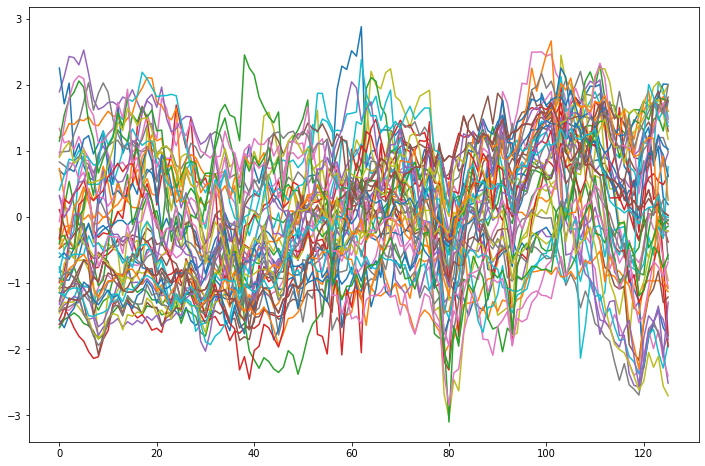

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(tickers_scaled.T)

In [ ]:
# Basik KMeans

  0%|          | 0/9 [00:00<?, ?it/s]

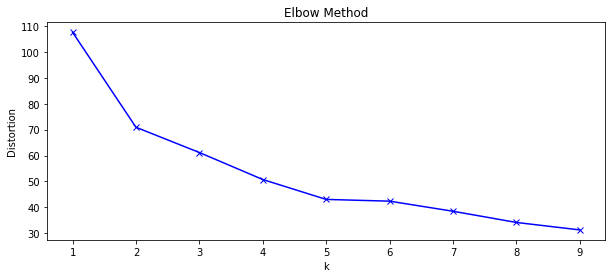

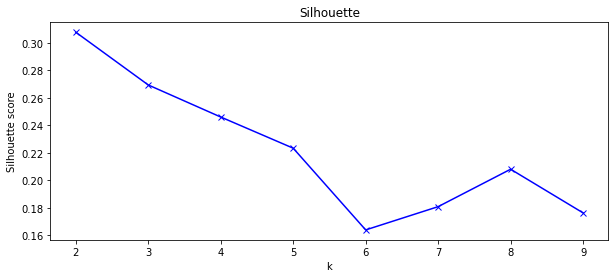

In [ ]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [ ]:
n_clusters = 6
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=6, n_jobs=3)

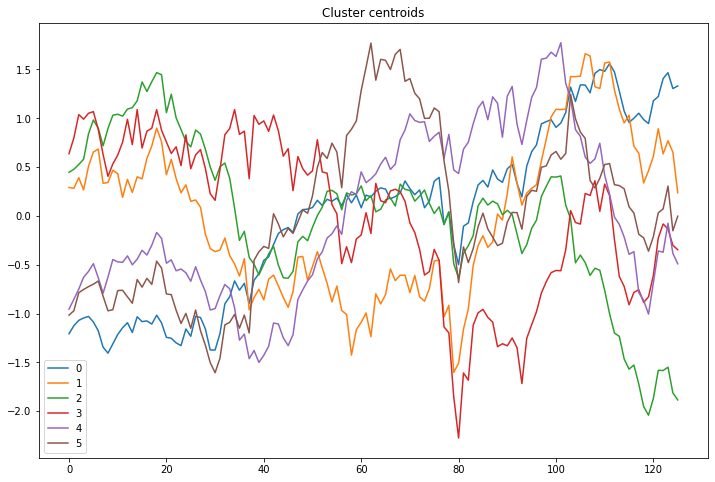

In [ ]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [ ]:
snp500['cluster'] = ts_kmeans.predict(tickers_scaled)
pd.DataFrame(snp500.groupby('cluster')['sector'].value_counts())

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 50 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


sector
cluster sector                        
0       Energy                       3
        Basic Materials              2
        Consumer Cyclical            2
        Consumer Defensive           2
        Financial Services           2
        Healthcare                   1
        Industrials                  1
        Real Estate                  1
1       Consumer Defensive           2
        Utilities                    2
        Communication Services       1
        Healthcare                   1
        Real Estate                  1
        Technology                   1
2       Consumer Cyclical            2
        Industrials                  2
        Healthcare                   1
        Real Estate                  1
        Utilities                    1
3       Financial Services           2
        Communication Services       1
        Consumer Cyclical            1
        Healthcare                   1
        Industrials                  1
        Real Estate                  1
4       Industrials                  4
        Technology                   2
        Utilities                    2
        Financial Services           1
        Healthcare                   1
5       Communication Services       1
        Healthcare                   1
        Industrials                  1
        Real Estate                  1

In [ ]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}\n{row.sector}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


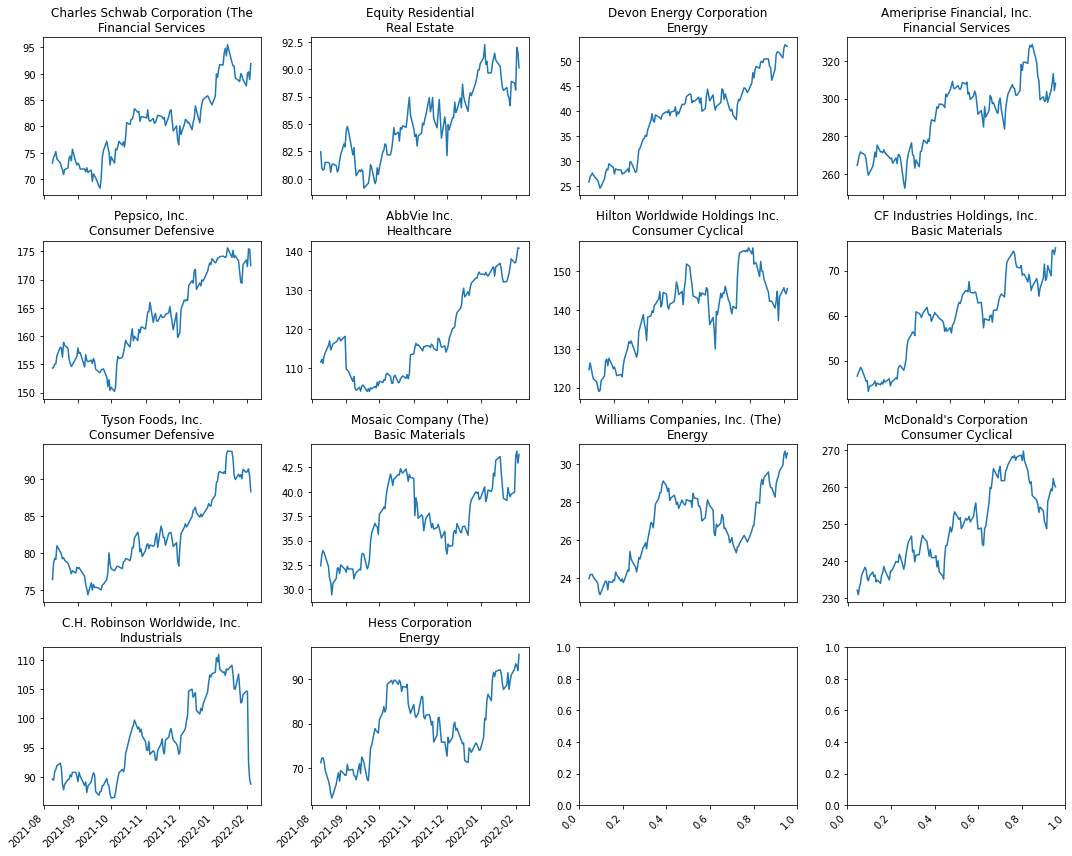

                          Cluster number: 1


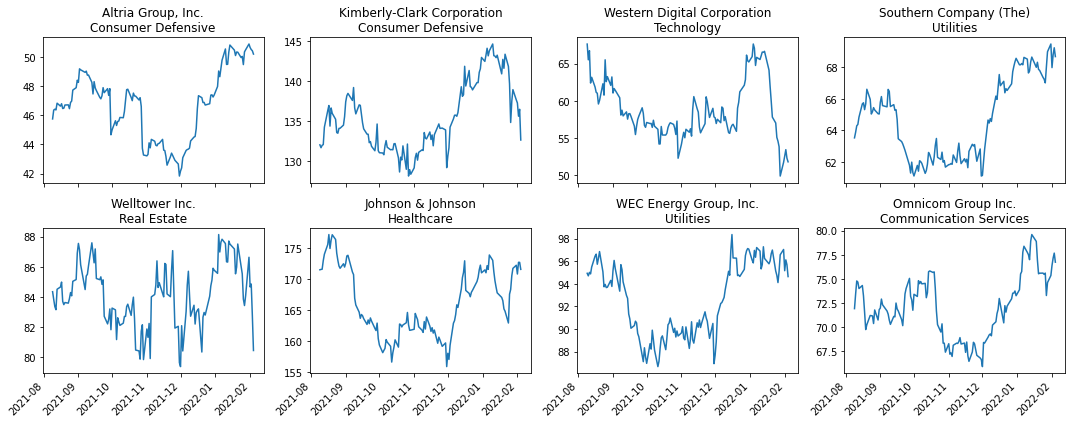

                          Cluster number: 2


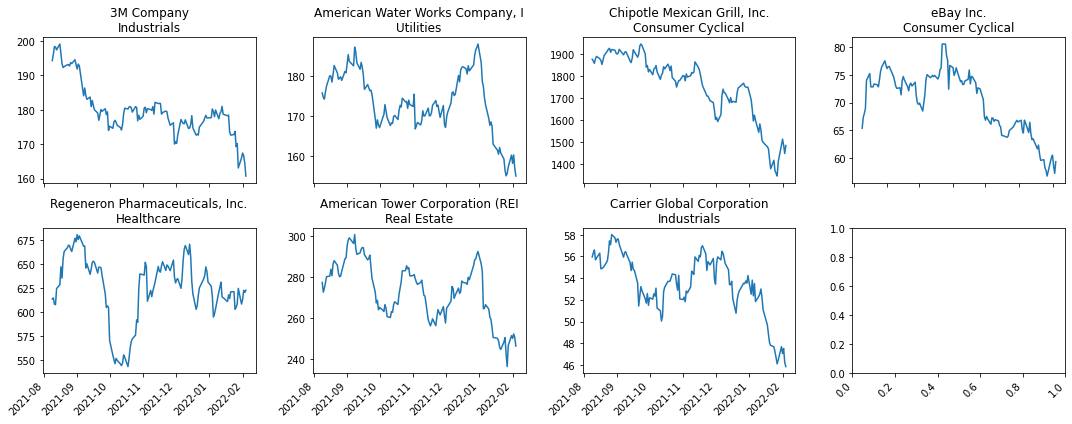

                          Cluster number: 3


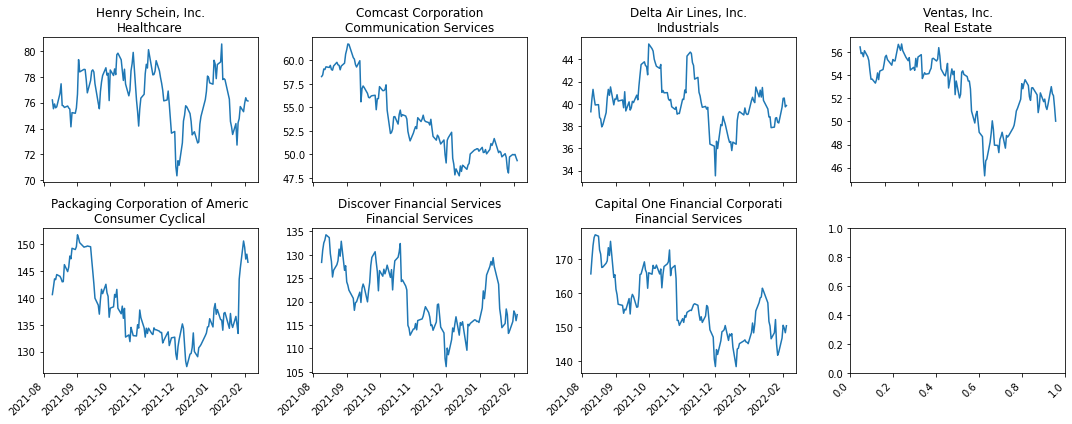

                          Cluster number: 4


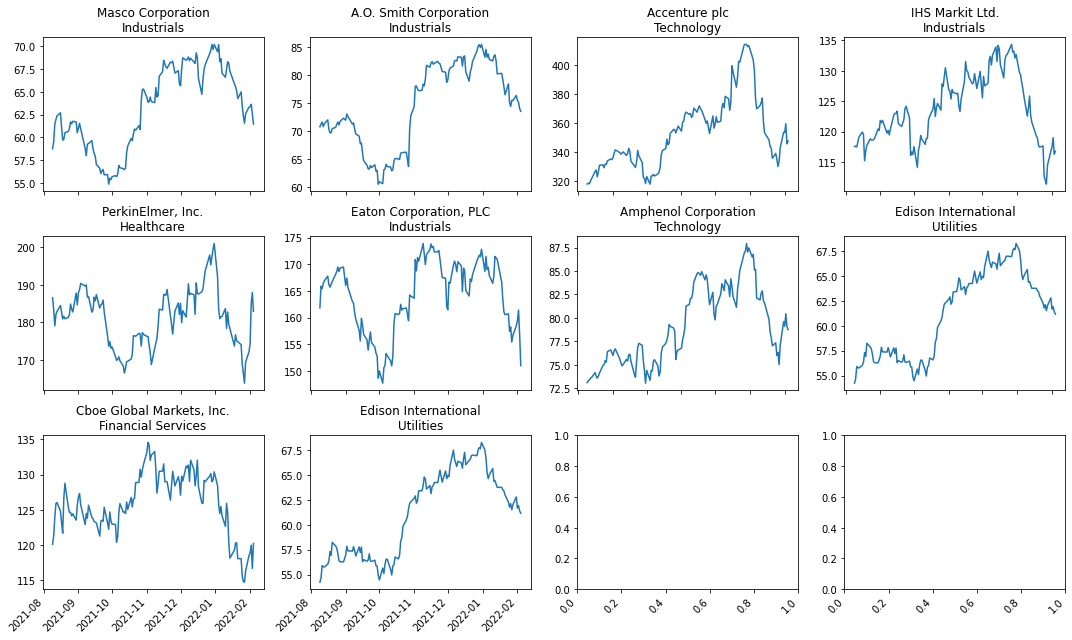

                          Cluster number: 5


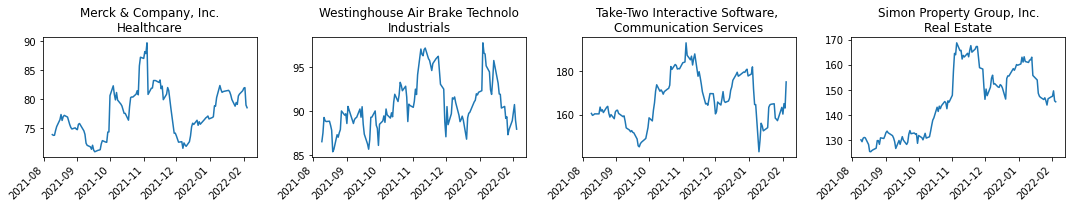

In [ ]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(snp500[snp500.cluster==cluster])

In [ ]:
### DTW

  0%|          | 0/9 [00:00<?, ?it/s]

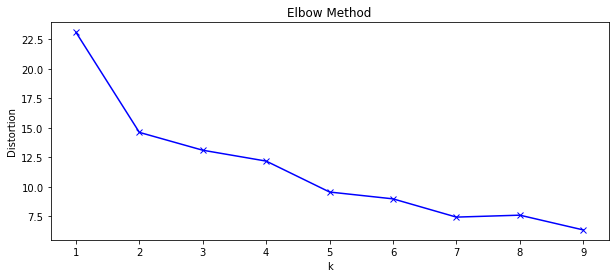

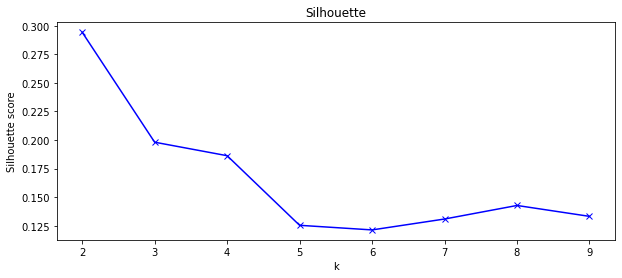

In [ ]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [ ]:
n_clusters = 6
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
ts_kmeans_dtw.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=6, n_jobs=6)

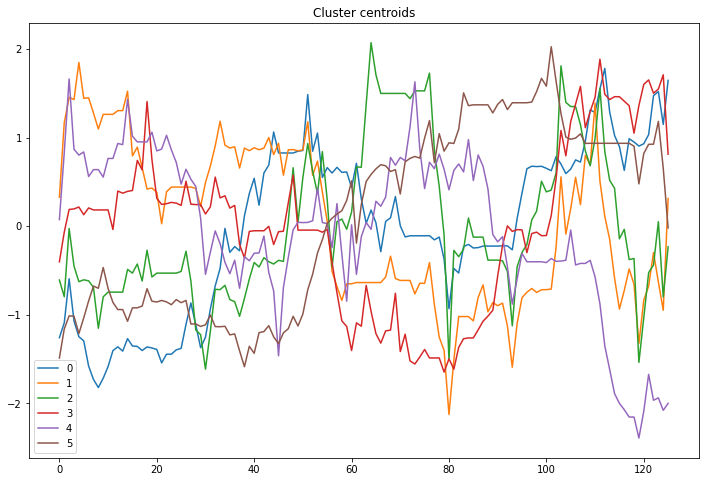

In [ ]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")

plt.legend()
plt.show()

In [ ]:
snp500['cluster'] = ts_kmeans_dtw.predict(tickers_scaled)
pd.DataFrame(snp500.groupby('cluster')['sector'].value_counts())

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 50 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


sector
cluster sector                        
0       Energy                       3
        Basic Materials              2
        Financial Services           2
        Healthcare                   1
        Real Estate                  1
1       Healthcare                   3
        Financial Services           2
        Communication Services       1
        Real Estate                  1
2       Industrials                  3
        Communication Services       1
        Healthcare                   1
3       Consumer Defensive           2
        Utilities                    2
        Communication Services       1
        Consumer Cyclical            1
        Healthcare                   1
4       Industrials                  3
        Consumer Cyclical            2
        Real Estate                  2
        Financial Services           1
        Technology                   1
        Utilities                    1
5       Industrials                  3
        Consumer Cyclical            2
        Consumer Defensive           2
        Technology                   2
        Utilities                    2
        Real Estate                  1

                          Cluster number: 0


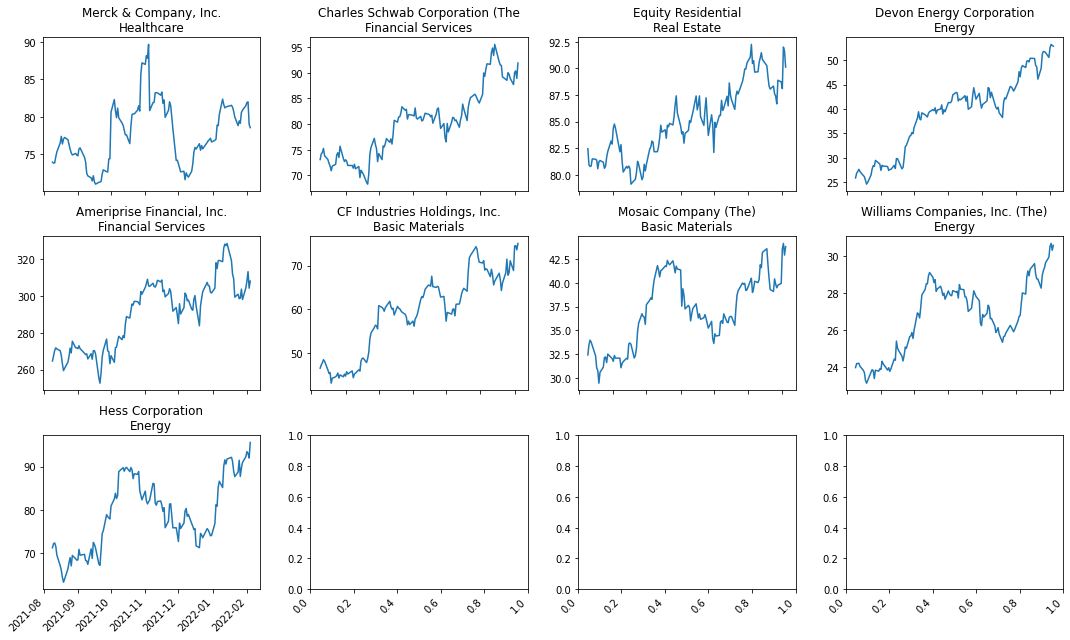

                          Cluster number: 1


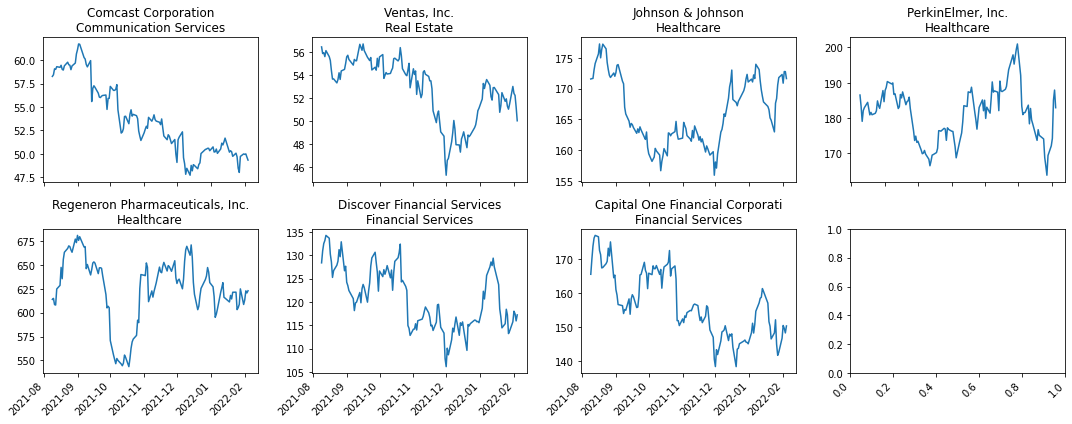

                          Cluster number: 2


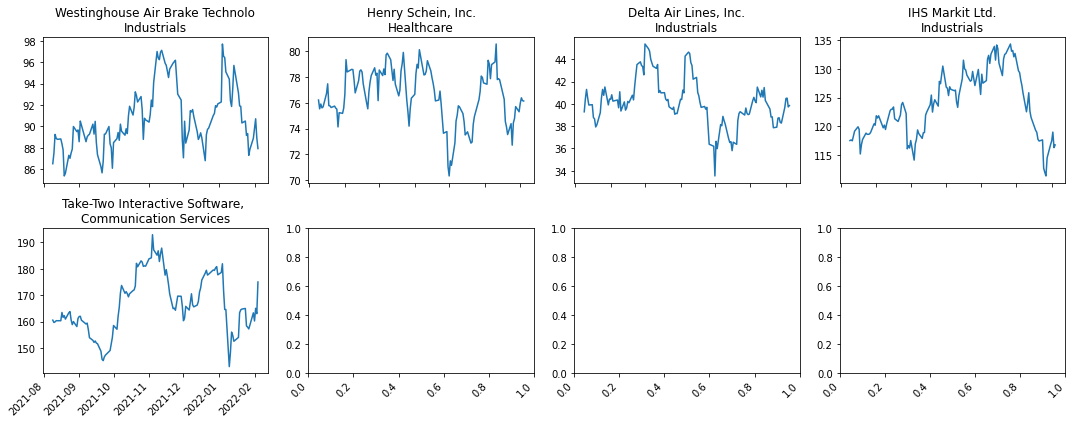

                          Cluster number: 3


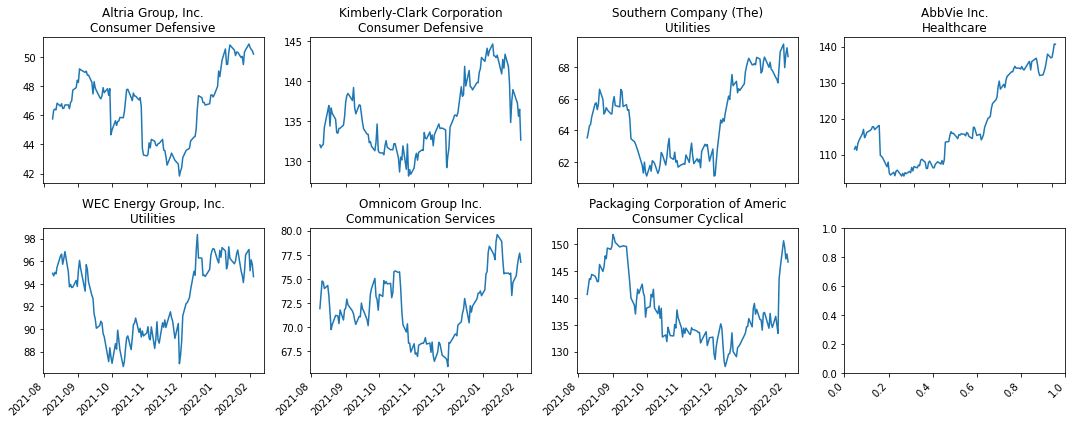

                          Cluster number: 4


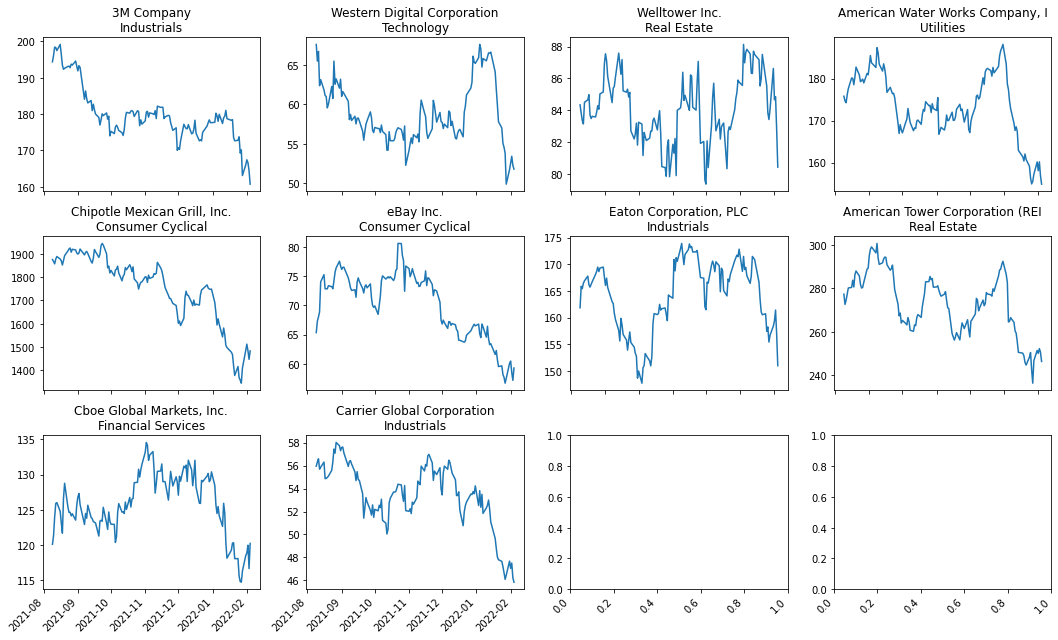

                          Cluster number: 5


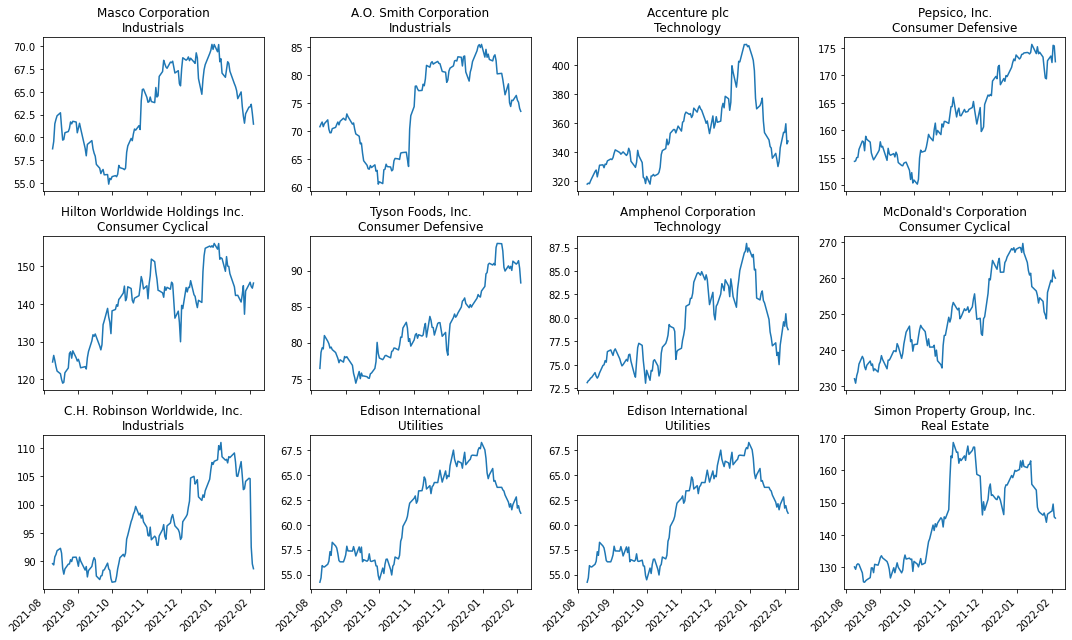

In [ ]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(snp500[snp500.cluster==cluster])